# Prompt engineering

In [2]:
import re
import string
import numpy as np
from math import pi
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

# import other python files
from utils_benchmark import *
from utils import *
from elaboration import *
from similarity import *
from flexibility import *
from process_humans_data import *

In [3]:
%load_ext autoreload
%autoreload 2

## Load data

In [4]:
humans = pd.read_csv('./data_processed/humans_data_processed.csv')

#todo
gpt_35_processed_prompt_1 = pd.read_csv('./data_processed/gpt35_323_prompt_1.csv')
gpt_4_processed_prompt_1  = pd.read_csv('./data_processed/gpt4_360_prompt_1.csv')

gpt_35_processed_prompt_2 = pd.read_csv('./data_processed/gpt35_352_prompt_2.csv')
gpt_4_processed_prompt_2  = pd.read_csv('./data_processed/gpt4_361_prompt_2.csv')

In [5]:
# normalize 
combined_data = pd.concat([
    humans.assign(dataset='Humans'),
    gpt_35_processed_prompt_1.assign(dataset='GPT-3.5 prompt 1'),
    gpt_4_processed_prompt_1.assign(dataset='GPT-4 prompt 1'),
    gpt_35_processed_prompt_2.assign(dataset='GPT-3.5 prompt 2'),
    gpt_4_processed_prompt_2.assign(dataset='GPT-4 prompt 2')
])

combined_data_norm = normalization_1(combined_data, check_norm = False)

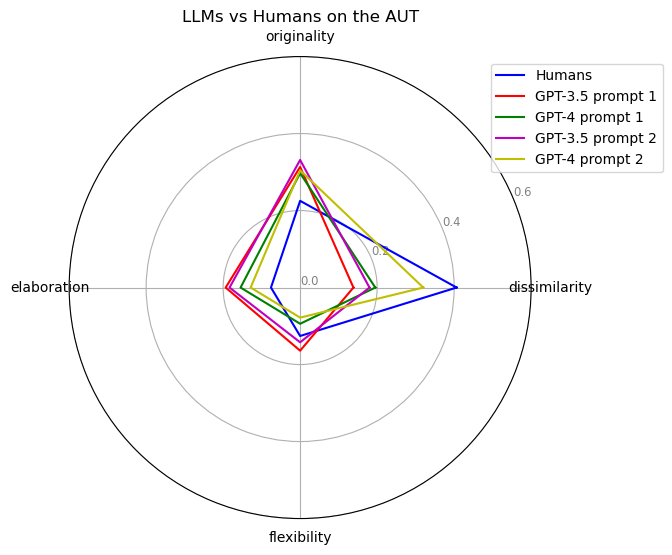

In [8]:
features = ['prompt', 'dissimilarity', 'originality', 'elaboration', 'flexibility']

humans_norm = combined_data_norm[combined_data_norm['dataset'] == 'Humans']
gpt_35_norm_p1 = combined_data_norm[combined_data_norm['dataset'] == 'GPT-3.5 prompt 1']
gpt_4_norm_p1 = combined_data_norm[combined_data_norm['dataset'] == 'GPT-4 prompt 1']
gpt_35_norm_p2 = combined_data_norm[combined_data_norm['dataset'] == 'GPT-3.5 prompt 2']
gpt_4_norm_p2 = combined_data_norm[combined_data_norm['dataset'] == 'GPT-4 prompt 2']

# List of dataframes and corresponding titles
dataframes = [humans_norm[features], gpt_35_norm_p1[features], gpt_4_norm_p1[features], gpt_35_norm_p2[features], gpt_4_norm_p2[features]]
titles = ['Humans', 'GPT-3.5 prompt 1', 'GPT-4 prompt 1', 'GPT-3.5 prompt 2', 'GPT-4 prompt 2']

# Plot radar chart for multiple dataframes
plot_radar_chart(dataframes, titles, avg_per_object = True)